Initializing Handlers...

Fetching stock data from Yahoo Finance...
Fetching stock data for MSFT,CRM...


[*********************100%***********************]  2 of 2 completed


Stock data fetched successfully.
Stock data aggregated to annual averages.

Annual Stock Data:
   Year  Stock_Price  Stock_Price
0  2022   176.666534   268.917091
1  2023   203.995200   313.951001

Processing ESG data...
ESG data loaded successfully.
ESG data reshaped to long format.
Missing values in 'Value' column replaced with NaN.
Filtered data for United States - CO2 emissions (metric tons per capita)

Filtered ESG Data:
      Country Name Country Code                             Series Name  \
10   United States          USA  CO2 emissions (metric tons per capita)   
81   United States          USA  CO2 emissions (metric tons per capita)   
152  United States          USA  CO2 emissions (metric tons per capita)   
223  United States          USA  CO2 emissions (metric tons per capita)   
294  United States          USA  CO2 emissions (metric tons per capita)   

        Series Code  Year  ESG_Indicator  
10   EN.ATM.CO2E.PC  1960            0.0  
81   EN.ATM.CO2E.PC  1961        

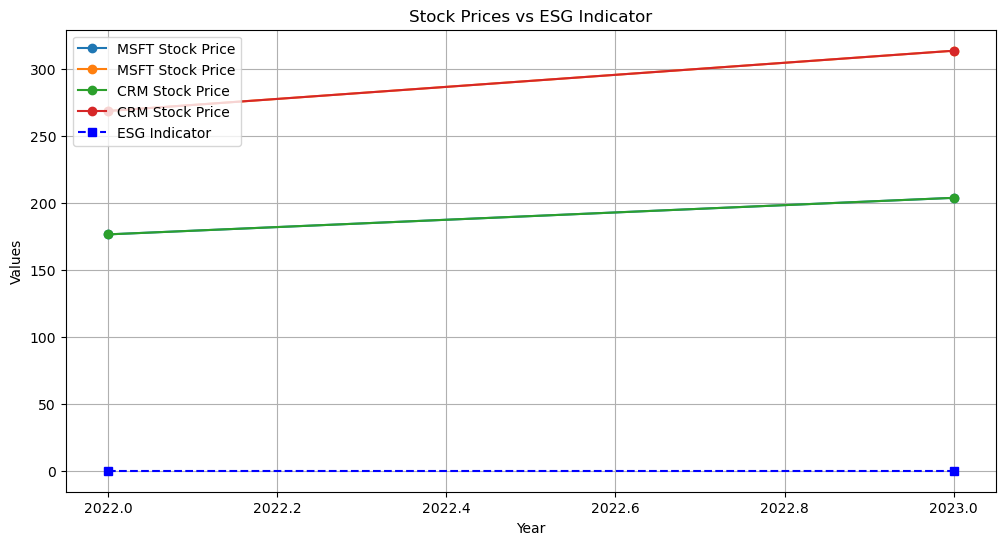

In [1]:
from key import POLYGON_API_KEY
from yahoo_handler import StockDataFetcher
from esg_processor import ESGProcessor
from api_handler import APIHandler
import pandas as pd
import matplotlib.pyplot as plt

def main():
    
    print("Initializing Handlers...")
    ticker = "MSFT,CRM" 
    start_date = "2022-01-01" 
    end_date = "2023-12-31"  
    
    
    yahoo = StockDataFetcher(ticker, start_date, end_date)
    esg_processor = ESGProcessor("Cleaned_ESG_Data.csv") 
    

    
    print("\nFetching stock data from Yahoo Finance...")
    stock_data = yahoo.fetch_stock_data()
    annual_stock_data = yahoo.aggregate_to_annual()
    print("\nAnnual Stock Data:")
    print(annual_stock_data)

    
    print("\nProcessing ESG data...")
    esg_processor.load_data()
    esg_processor.reshape_data()
    esg_processor.clean_missing_values()

    
    country = "United States"
    indicator = "CO2 emissions (metric tons per capita)" 
    esg_filtered = esg_processor.filter_data(country, indicator)
    esg_filtered = esg_filtered.rename(columns={"Value": "ESG_Indicator"})
    print("\nFiltered ESG Data:")
    print(esg_filtered.head())

    
    print("\nMerging ESG data and Stock data...")
    merged_data = pd.merge(annual_stock_data, esg_filtered, on="Year", how="inner")
    print("\nMerged Data:")
    print(merged_data.head())

    
    print("\nVisualizing the Data...")

    plt.figure(figsize=(12, 6))


    merged_data_msft = merged_data.copy()
    merged_data_msft['Ticker'] = "MSFT"

    merged_data_crm = merged_data.copy()
    merged_data_crm['Ticker'] = "CRM"


    combined_data = pd.concat([merged_data_msft, merged_data_crm])


    for stock in combined_data['Ticker'].unique():
        stock_data = combined_data[combined_data['Ticker'] == stock]
        plt.plot(stock_data['Year'], stock_data['Stock_Price'], 
             label=f"{stock} Stock Price", marker='o')


    plt.plot(merged_data['Year'], merged_data['ESG_Indicator'], 
         label="ESG Indicator", color='blue', linestyle='--', marker='s')


    plt.title("Stock Prices vs ESG Indicator")
    plt.xlabel("Year")
    plt.ylabel("Values")
    plt.legend(loc="upper left") 
    plt.grid()


    plt.show()


    
        
if __name__ == "__main__":
    main()
